In [1]:
from sdv import SDV
import pandas as pd
import pyreadstat as prs
import seaborn as sns

In [2]:
sdv = SDV()

In [4]:
long = pd.read_spss('../data/uktus15_diary_ep_long.sav')

long_df, long_meta = prs.read_sav('../data/uktus15_diary_ep_long.sav', encoding="latin1")


In [18]:
data_enc = pd.read_csv('../data/long_encoded.csv')

In [5]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [20]:
from sdv import Metadata

metadata = Metadata()

In [21]:
table = {'long': data_enc}

In [22]:

metadata.add_table(
    name = 'long',
    data = table['long']
)

In [23]:
sdv.fit(metadata, table)

In [24]:
sdv.save('../models/sdv.pkl')

In [25]:
sdv = SDV.load('../models/sdv.pkl')

In [27]:
samples = sdv.sample()

In [28]:
samples['long'].shape

(587632, 50)

In [29]:
samples['long'].head()

,strata,psu,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,...,impuflag,serial,pnum,DPday,DiaryDate_Act,dyear,dia_wt_a,dia_wt_b,epnum,eptime
0,223,477,0,2,0,1,11,1,22,0,...,6,21695618.0,2.0,1.365166e+10,1.365177e+10,2015.0,0.671714,0.499083,23.0,120.0
1,184,438,0,2,0,0,11,0,76,0,...,4,17946261.0,1.0,1.362782e+10,1.362795e+10,2014.0,1.087774,1.059078,7.0,20.0
2,115,304,0,2,0,1,9,0,21,0,...,5,17706956.0,2.0,1.363953e+10,1.363988e+10,2014.0,0.323503,0.787291,26.0,90.0
3,54,89,0,2,0,0,4,0,67,0,...,3,11011202.0,2.0,1.362447e+10,1.362435e+10,2014.0,0.338889,0.354989,1.0,10.0
4,167,475,1,2,0,0,7,0,35,1,...,5,25273446.0,1.0,1.363025e+10,1.362992e+10,2014.0,1.080324,0.911963,15.0,30.0


<AxesSubplot:>

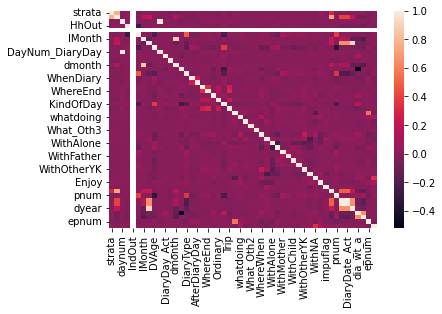

In [30]:
sns.heatmap(samples['long'].corr())

<AxesSubplot:>

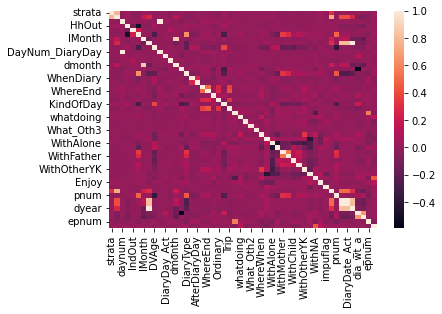

In [31]:
sns.heatmap(data_enc.corr())

In [32]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587632 entries, 0 to 587631
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   strata           587632 non-null  int64  
 1   psu              587632 non-null  int64  
 2   daynum           587632 non-null  int64  
 3   HhOut            587632 non-null  int64  
 4   IndOut           587632 non-null  int64  
 5   DMFlag           587632 non-null  int64  
 6   IMonth           587632 non-null  int64  
 7   IYear            587632 non-null  int64  
 8   DVAge            587632 non-null  int64  
 9   DayNum_DiaryDay  587632 non-null  int64  
 10  DiaryDay_Act     587632 non-null  int64  
 11  DiaryDateDiff    587632 non-null  int64  
 12  dmonth           587632 non-null  int64  
 13  ddayw            587632 non-null  int64  
 14  DiaryType        587632 non-null  int64  
 15  WhenDiary        587632 non-null  int64  
 16  AfterDiaryDay    587632 non-null  int6

In [33]:
data_enc.corr()

,strata,psu,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,...,impuflag,serial,pnum,DPday,DiaryDate_Act,dyear,dia_wt_a,dia_wt_b,epnum,eptime
strata,1.000000,0.781182,-0.000653,0.049675,-0.014090,-0.030640,0.013463,0.022773,-0.009649,-0.000653,...,-0.011609,0.297015,-0.013022,0.008481,0.008254,0.022713,0.013131,0.020472,-0.029170,0.015441
psu,0.781182,1.000000,-0.001155,0.044937,-0.017813,-0.019764,0.163861,0.259127,-0.010292,-0.001155,...,-0.001729,0.741680,-0.002260,0.407274,0.407125,0.257199,-0.057087,-0.083426,-0.031073,0.017234
daynum,-0.000653,-0.001155,1.000000,0.003359,0.000994,-0.006010,0.001498,-0.001542,0.004369,1.000000,...,0.001824,-0.000349,-0.005219,0.007832,0.007840,-0.000287,0.010637,-0.000826,-0.033096,0.019850
HhOut,0.049675,0.044937,0.003359,1.000000,-0.146418,-0.480777,-0.018880,-0.028004,0.071174,0.003359,...,-0.005172,0.013330,-0.003510,-0.066238,-0.065376,-0.027013,-0.078292,-0.109343,-0.019573,0.008495
IndOut,-0.014090,-0.017813,0.000994,-0.146418,1.000000,0.220209,0.020875,-0.024180,-0.018308,0.000994,...,-0.001978,-0.016614,0.039876,-0.013213,-0.010063,-0.024544,0.001000,0.000063,-0.001815,0.001788
DMFlag,-0.030640,-0.019764,-0.006010,-0.480777,0.220209,1.000000,0.016719,0.006189,-0.274021,-0.006010,...,0.000258,-0.000113,0.483116,0.025964,0.025366,0.005372,-0.004580,-0.010762,-0.055868,0.027646
IMonth,0.013463,0.163861,0.001498,-0.018880,0.020875,0.016719,1.000000,-0.135448,-0.008301,0.001498,...,-0.001821,0.223838,0.020597,0.152990,0.152765,-0.143313,-0.129208,-0.195517,0.007844,-0.004097
IYear,0.022773,0.259127,-0.001542,-0.028004,-0.024180,0.006189,-0.135448,1.000000,-0.021294,-0.001542,...,0.015803,0.296047,0.011148,0.809943,0.809912,0.992123,-0.072886,-0.110728,-0.023478,0.012025
DVAge,-0.009649,-0.010292,0.004369,0.071174,-0.018308,-0.274021,-0.008301,-0.021294,1.000000,0.004369,...,-0.014462,-0.010386,-0.372611,-0.017430,-0.016723,-0.022975,-0.050773,-0.070699,0.037284,-0.023522
DayNum_DiaryDay,-0.000653,-0.001155,1.000000,0.003359,0.000994,-0.006010,0.001498,-0.001542,0.004369,1.000000,...,0.001824,-0.000349,-0.005219,0.007832,0.007840,-0.000287,0.010637,-0.000826,-0.033096,0.019850
